In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import scipy.stats as ss
import pandas as pd
import numpy as np

from auxiliary import plot_individual_specific_effects
from auxiliary import get_lalonde_data

# Potential outcome model

### Introduction

Given what we know from the introduction about the potential outcome model, we will initially prepare the Lalonde Dataset to fit the framework and use it as a running example going forward.

What are this example's ...

* potential outcomes
* counterfactual state
* treatment


In [2]:
df = get_lalonde_data()
df.head()

,treat,re78,Y,Y_0,Y_1,D
101,1,9970.681,9970.681,NaN,9970.681,1
611,0,7094.920,7094.920,7094.920,NaN,0
396,0,11223.720,11223.720,11223.720,NaN,0
681,0,4687.937,4687.937,4687.937,NaN,0
397,0,5088.760,5088.760,5088.760,NaN,0


We are dealing with a binary treatment here: $D = 1$ if the individual did participate in the training program and $D = 0$ if  it did not. However, in practice assigning **treatment** is never that easy. We lump a lot of heterogeneity together (e.g. different sites, content of curriculum) that might affect the success of program participation. Maybe we should stratify the analysis by site?

### Individual-specific effect of treatment

It would be great if we could get our hands on the individual-specific effect of treatment.

\begin{align*}
\delta_i = y_i^1 - y_i^0
\end{align*}

* Why do individuals have potentially different effects of treatment? 

(0.0, 0.5)

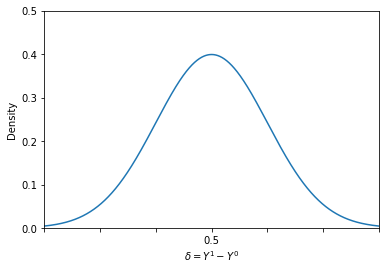

In [3]:
fig, ax = plt.subplots()

x = np.linspace(-5, 5, 5000)
pdf = ss.norm.pdf(x, 0, 1)

ax.plot(x, pdf)

ax.set_xlabel(r"$\delta = Y^1 - Y^0$")
ax.set_ylabel("Density")
x_formatter = FixedFormatter(["", "", "", 0.5, "", "", ""])
x_locator = FixedLocator([-3, -2, -1 ,0 ,1 ,2, 3])
ax.xaxis.set_major_locator(x_locator)
ax.xaxis.set_major_formatter(x_formatter)
ax.set_xlim([-3, 3])
ax.set_ylim([0, 0.5])

There might be considerable heterogeneity in the benefits of treatment among the population. And summarizing the distribution of benefits with a single number, for example $E[\delta]$, might result in a loss of information.

**Examples**

* medical treatment
* ..

Give our definitions of $(Y^1, Y^0, D)$ and their individual realizations $(y^1_i, y^0_i, d_i)$ we can now define the observed outcome $Y$ in terms of them.

\begin{align*}
Y = \begin{cases}
Y^1 & \quad\text{if}\quad D = 1 \\
Y^0 & \quad\text{if}\quad D = 0
\end{cases}
\end{align*}

or more compactly in switching-regime notation

\begin{align*}
Y = D Y^1 + (1 - D) Y^0.
\end{align*}

This leads Holland (1986) to describe the fundamental problem of causal inference:

<img src="material/fig-fundamental-problem.png" width="500">

$\rightarrow$ as only the diagonal of the table is observable we cannot simply compute $\delta_i$ by taking the difference in potential outcomes $(y^1_i, y^0_i)$.

In [4]:
df.head()

,treat,re78,Y,Y_0,Y_1,D
101,1,9970.681,9970.681,NaN,9970.681,1
611,0,7094.920,7094.920,7094.920,NaN,0
396,0,11223.720,11223.720,11223.720,NaN,0
681,0,4687.937,4687.937,4687.937,NaN,0
397,0,5088.760,5088.760,5088.760,NaN,0


### Population-level parameters

It looks like we need to give up any hope of obtaining the individual-specific effect of treatment. But what can we still hope for?

$\rightarrow$ population-level parameters

* What are common examples?

* What are the policy questions they address?

* What is their relationship to each other?

\begin{align*}
\begin{array}{lll}
E[Y^1 - Y^0] & \qquad ATE & \qquad\text{average effect of treatment} \\
E[Y^1 - Y^0 \mid D = 1] & \qquad ATT & \qquad\text{average effect on treated} \\
E[Y^1 - Y^0 \mid D = 0] & \qquad ATC & \qquad\text{average effect on control}
\end{array}
\end{align*}

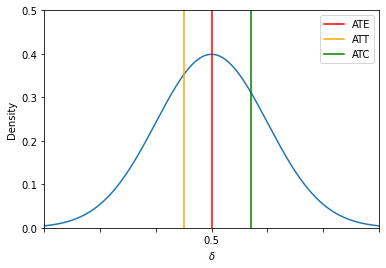

In [5]:
plot_individual_specific_effects(with_parameters=[0, 0.7, -0.5])

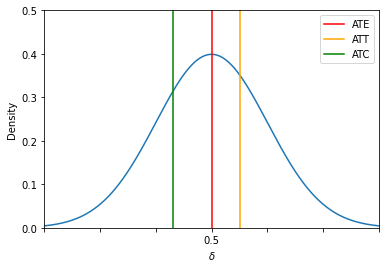

In [6]:
plot_individual_specific_effects(with_parameters=[0, -0.7, 0.5])

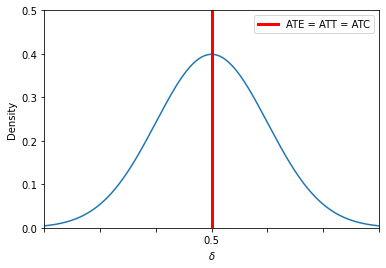

In [6]:
plot_individual_specific_effects(with_parameters=[0, 0, 0])

### Stable unit treatment value assumption

The potential outcome model gets its empirical tractability when combined with the **Stable Unit Treatment Value Assumption (SUTVA)** of which there exist many formulations. We will go with the one from Imbens and Rubin (2015):

> The potential outcomes for any unit do not vary with the treatments assigned to other units, and, for each unit there are no different forms or versions of each treatment level, which lead to different potential outcomes.

The table below shows all possible assignment patterns for a hypothetical treatment where the only constraint is that at least one individual remains in the treatment and control group. As we increase participation from one to two individuals, the potential outcome $Y_1$ declines.

<img src="material/fig-stable-unit-treatment.png" width="500">

* When do we need to expect this is violated?

    * **influence patterns** that result from contact across individuals in social or physical space
    * **dilution / concentration patterns** that one can assume would result from changes in the prevalence of treatment

### Treatment assignment and observational studies

* randomized experiment

\begin{align*}
(Y^0, Y^1)  \perp \!\!\! \perp D
\end{align*}

* observational study

> A *observational study* is an empirical investigation of treatments, policies, or exposures and the effects they cause, but it differs from an experiment in that the investigator cannot control the assignment of treatments to subjects. (Rosenbaum (2002))

### Naive estimation of average causal effects

We will now first outline the problem with the naive estimation of average causal effects. Then we take a closer look at the different sources of biases involved and finally discuss the set of assumptions used to ***solve*** these issues.

\begin{align*}
\hat{\delta}_{NAIVE} \equiv E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0]
\end{align*}

We can further decompose the average treatment effect by treatment status as the individual assignment is mutually exclusive. 


\begin{align*}
E[Y^1 - Y^0] & = E[\delta] & = \{\pi E[Y^1\mid D = 1] + (1 - \pi)E[Y^1\mid D = 0]\} \\
&&- \{\pi E[Y^0\mid D = 1] + (1 - \pi)E[Y^0\mid D = 0]\}
\end{align*}

The average treatment effect is a function of five unknowns. Which components can be easily computed from data?

\begin{align*}
E_N[y_i\mid d_i = 1] \xrightarrow{p} E[Y^1\mid D = 1] \neq E[Y^1]\\
E_N[y_i\mid d_i = 0] \xrightarrow{p} E[Y^0\mid D = 0] \neq E[Y^0]
\end{align*}

#### Biases

\begin{align*}
E[Y^1 \mid D = 1] - E[Y^0 \mid D = 0] & = E[\delta] + \underbrace{\{E[Y^0\mid D= 1] - E[Y^0\mid D= 0]\}}_{\text{Baseline bias}} \\
& + (1 - \pi)  \underbrace{\left\{E[\delta \mid D = 1] -E[\delta \mid D = 0]\right\}}_{\text{Differential treatment effect bias}}
\end{align*}

<img src="material/fig-bias-example.png" width="500">

The additional information provided in the text states that $\pi = 0.3$ meaning that 30\% of the sample participate in the treatment.

\begin{align*}
ATT & = E[Y_1 - Y_0 \mid D = 1]= 10 - 6 = 4 \\
ATC & = E[Y_1 - Y_0 \mid D = 0] = 8 - 5 = 3 \\
\delta^{NAIVE} & = E[Y_1\mid D = 1] - E[Y_0\mid D = 0] = 10 - 5 = 5
\end{align*}

Now we are ready to calculate the average treatment effect:

\begin{align*}
ATE = E[Y_1 - Y_0]  & = \pi\, E[Y_1 - Y_0 \mid D = 1] +  (1 - \pi)\, E[Y_1 - Y_0 \mid D = 0] \\
& = 0.3 \times 4 + 0.7 \times 3 = 3.3
\end{align*}

Next, we can determine the different components of the bias.

\begin{align*}
\Delta^{\text{base}} = E[Y^0\mid D= 1] - E[Y^0\mid D= 0] = 6 - 5 =  1 \\
\Delta^{\text{diff}} = (1 - \pi)\left( E[\delta \mid D = 1] - E[\delta \mid D = 0]\right) = 0.7 \left( (10 - 6) - (8  - 5 )\right) = 0.7
\end{align*}

There are several different representation of the bias when using the naive estimator of mean difference in observed outcomes by treatment status as an estimate for the effect of treatment. We continue with the exposition in Frölich & Sperlich (2019) and Heckman, Urzua, & Vytlacil (2006).

\begin{align*}
E[Y\mid D = 1] - E[Y\mid D = 0] & = E[Y^1\mid D = 1] - E[Y^0\mid D = 0] \\
& =E[Y^1\mid D = 1]  - E[Y^0\mid D = 1] \\
& + E[Y^0\mid D = 1] - E[Y^0\mid D = 0]  \\
& = \underbrace{E[Y^1 - Y^0\mid D = 1]}_{TT} + \underbrace{E[Y^0\mid D= 1]- E[Y^0 \mid D = 0]}_{\text{Selection bias}}
\end{align*}

Now we can simply add and subtract $E[Y_1 - Y_0]$ to get the more economic version.

\begin{align*}
E[Y\mid D = 1] - E[Y\mid D = 0] & = \underbrace{E[Y^1 - Y^0]}_{ATE} \\
& + \underbrace{E[Y^1 - Y^0 \mid D = 1] - E[Y^1 - Y^0]}_{\text{Sorting on gains}} \\
& + \underbrace{E[Y^0\mid D = 1] - E[Y^0 \mid D = 0]}_{\text{Sorting on levels}}
\end{align*}

Sorting on levels is simply a different phrase for selection bias. 


The exposition in our core textbook is slightly different. Here the term **bias** has two separate components which are **baseline bias** and **differential treatment effect bias**. See the discussion in the book in the subsection on the typical inconsistency and bias of the naive estimator. The term baseline bias refers to the concept of sorting and levels and selection bias.

Differential treatment bias is defined as:

\begin{align*}
E[Y \mid D = 1] - E[Y \mid D = 0] & =  \underbrace{E[\delta]}_{ATE} + \underbrace{\{E[Y^0\mid D= 1] - E[Y^0\mid D= 0]\}}_{\text{Baseline bias}} \\
& + \underbrace{(1 - \pi) \{E[\delta \mid D = 1] -E[\delta \mid D = 0]\}}_{\text{Differential treatment effect bias}}
\end{align*}

The last term is derived derived from the term describing selection on gains by the following decomposition.

\begin{align*}
E[Y^1 - Y^0] = \pi E [Y^1  - Y^0 \mid D = 1] + (1 - \pi) E [Y^1  - Y^0 \mid D = 0]
\end{align*}

It is interpreted as the difference in effects between treated and control weighted by  the share of control individuals. It is probably best thought of as an increment to the first term describing the average effect of treatment.

#### Assumptions

So, the SUTVA assumption is only necessary but not sufficient to learn about the effect of treatment in light of the biases discussed above. We are still stuck with several unknowns that we need to compute the average effect of treatment.

Consider the following two assumptions:

\begin{align*}
E[Y^1\mid D = 1] = E[Y^1\mid D = 0] \\
E[Y^0\mid D = 1] = E[Y^0\mid D = 0] \\
\end{align*}

and recall our naive estimate 


\begin{align*}
\hat{\delta}_{NAIVE} & = E_N[y_i\mid d_i = 1] - E_N[y_i\mid d_i = 0] \\
& \xrightarrow{p} E[Y^1\mid D = 1] - E[Y^0\mid D = 0] 
\end{align*}

* What assumptions suffice to estimate the ATE with the naive estimator?

    * about potential outcomes for subsets of the population 
    * about the treatment selection / assignment process 

### Missing data and imputation

This is an adopted example from Imbens & Rubin (2015).

In [84]:
df = get_lalonde_data()
df.head()

,treat,re78,Y,Y_0,Y_1,D
100,1,0.000,0.000,NaN,0.0,1
561,0,5670.820,5670.820,5670.820,NaN,0
130,1,0.000,0.000,NaN,0.0,1
318,0,0.000,0.000,0.000,NaN,0
687,0,7659.218,7659.218,7659.218,NaN,0


We can impute the missing values simply by their average counterpart.

In [71]:
is_treated = df["D"] == 1

df.loc[~is_treated, "Y_1"] = df.loc[is_treated, "Y"].mean()
df.loc[is_treated, "Y_0"] = df.loc[~is_treated, "Y"].mean()

In [50]:
df.head()

,treat,re78,Y,Y_0,Y_1,D
479,0,6930.336,6930.336,6930.336,NaN,0
480,0,3795.799,3795.799,3795.799,NaN,0
343,0,0.000,0.000,0.000,NaN,0
690,0,2652.625,2652.625,2652.625,NaN,0
70,1,0.000,0.000,NaN,0.0,1


In [72]:
initial_stat = (df["Y_1"] - df["Y_0"]).mean()
print(f"Our estimated treatment effect is {initial_stat:10.2f}")

Our estimated treatment effect is     886.30


However, this does not really account for any uncertainty in our estimate. Can we do better? We now switch to the imputation of the counterfactual outcome on the individual level.

In [80]:
np.random.seed(123)  # set seed to ensure reproducibility
df = get_lalonde_data()  # get the original data

status_counts = df["D"].value_counts().to_dict()

stats = list()
for _ in range(100):
    y_1_sampled = df["Y_1"].dropna().sample(n=status_counts[0], replace=True).values
    y_0_sampled = df["Y_0"].dropna().sample(n=status_counts[1], replace=True).values

    df_boot = df.copy()

    is_treated = df_boot["D"] == 1
    df_boot.loc[is_treated, "Y_0"] = y_0_sampled
    df_boot.loc[~is_treated, "Y_1"] = y_1_sampled

    stat = (df_boot["Y_1"] - df_boot["Y_0"]).mean()
    stats.append(stat)
print(f"Our estimated treatment effect is {np.mean(stats):10.2f}")

Our estimated treatment effect is     907.86


How does the full distribution of estimates look like?

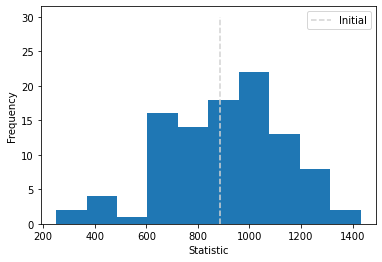

In [74]:
fig, ax = plt.subplots()
ax.hist(stats)
ax.set_xlabel("Statistic")
ax.set_ylabel("Frequency")
ax.vlines(initial_stat, 0, 30, linestyles="--", label="Initial", color="lightgrey")
ax.legend()

Still some limitations remains. For example, we do sample from the empirical distribution of the observed outcomes and not the actual distribution. Phrased differently, we treat the distribution of potential outcomes as known and abstract from any uncertainty in our knowledge about it.

### Extensions of the binary potential outcome model

* over-time potential outcomes and causal effects
    * a single unit over time (time series data)
    * many units over time (panel data)
    
* many-valued treatments

#### Over-time potential outcomes

We explore the case of a single unit over time.

**Ingredients** 

* discrete time periods, $t\in\{1, ..., T\}$
* sequence of observed values, $\{y_1, y_2, ..., y_T\}$
* treatment initiated in $t^*$ 
* duration of treatment $k$


Setting up the potential outcome model to explore the basic features of before-and-after designs for a single unit of analsysis.

* before the treatment is introduced (for $t < t^*$):

\begin{align*}
D_t & = 0 \\
Y_t & = Y^0_t\\
\end{align*}

* while the treatment is in place (from $t^*$ through $t^* + k$):

\begin{align*}
D_t & = 1 \\
Y_t & = Y^1_t\\
Y^0_t & \text{exists but is counterfactual}
\end{align*}

* after the treatment ends (for time periods $t > (t^* + k)$):
\begin{align*}
D_t & = 0 \\
Y_t & = Y^0_t\\
Y^1_t & \text{exists but is counterfactual}
\end{align*}

The following is an adapted example from our textbook. 

#### Year of the fire horse

We study the effect of Japanese folk belief that families who give birth to babies will suffer untold miseries. This example does not only illustrative the versatility of the potential outcome framework but also serves as an example that different approaches (informed by domain-expertise) can result in different reasonable imputations for the counterfactual outcome.

<img src="material/fig-birth-rates.png" width="500">

The treatment indicator is as follows: $D_{1966} = 1$ and $D_{\neq 1966} = 0$ and we are interested in its effect on the birth rate in Japan

\begin{align*}
\delta_{1966} = y^1_{1966} - y^0_{1966}.
\end{align*}

A reasonable approach is to estimate it by:

\begin{align*}
\hat{\delta}_{1966} & = y_{1966} - y^0_{1966}\\
\end{align*}

In [85]:
df = pd.read_csv("material/world_bank.csv", skiprows=4)
df.set_index("Country Code", inplace=True)
df.drop(["Indicator Name", "Indicator Code"], axis=1, inplace=True)

df = df.loc["JPN", "1960":"2017"]
df = df.to_frame()
df.index.name = "Year"
df.columns = ["Birth rate"]

df.sort_index(inplace=True)
df.index = df.index.astype(int)
df.head()

,Birth rate
Year,
1960,17.3
1961,17
1962,17.1
1963,17.4
1964,17.8


Let's get to work.

Text(0.5, 0, 'Year')

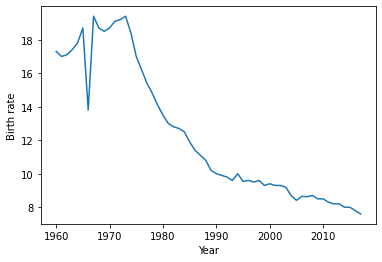

In [86]:
fig, ax = plt.subplots()
ax.plot(df["Birth rate"].index, df["Birth rate"])
ax.set_ylabel("Birth rate")
ax.set_xlabel("Year")

In [87]:
df.loc[slice(1960, 1970), "Birth rate"]

Year
1960    17.3
1961      17
1962    17.1
1963    17.4
1964    17.8
1965    18.7
1966    13.8
1967    19.4
1968    18.7
1969    18.5
1970    18.7
Name: Birth rate, dtype: object

We can just take the year before or after treatment?

In [88]:
estimates = list()
for label, year in [("before", 1965), ("after", 1967)]:
    y_0 = df.loc[year, "Birth rate"]
    y_1 = df.loc[1966, "Birth rate"]
    print(f" Using the year {label}, the treatment effect is {y_1 - y_0:10.5f}")
    estimates.append(y_1 - y_0)

 Using the year before, the treatment effect is   -4.90000
 Using the year after, the treatment effect is   -5.60000


Among demographers, there is the consensus that taking the average of 1963 and 1969 the way to go instead.

In [89]:
y_0 = df.loc[[1963, 1969], "Birth rate"].mean()
y_1 = df.loc[1966, "Birth rate"]
print(" Another treatment effect is {:10.5f}".format(y_1 - y_0))
estimates.append(y_1 - y_0)

 Another treatment effect is   -4.15000


Now we have multiple effects of treatment. Which is it?

Text(0, 0.5, 'Effect')

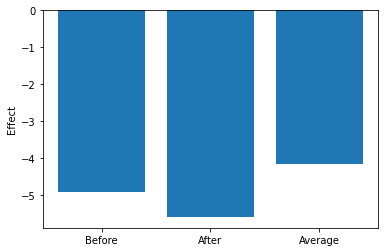

In [90]:
labels = ["Before", "After", "Average"]
fig, ax = plt.subplots()
ax.bar(labels, estimates)
ax.set_ylabel("Effect")

### Additional resources

* **Imbens, G. W. (2020)**. [Potential outcome and directed acyclic graph approaches to causality: Relevance for empirical practice in economics](https://www.aeaweb.org/articles?id=10.1257/jel.20191597), *Journal of Economic Literature*, 58(4), 1129-79.

### Resources

* **Frölich, M., and Sperlich, S. (2019)** . [Impact evaluation: Treatment effects and causal analysis](https://www.cambridge.org/de/academic/subjects/economics/econometrics-statistics-and-mathematical-economics/impact-evaluation-treatment-effects-and-causal-analysis?format=AR&isbn=9781108617772). Cambridge, England: *Cambridge University Press*.


* **Heckman, J. J., Urzua, S. and Vytlacil, E. (2006)**. [Understanding instrumental variables in models with essential heterogeneity](https://www.nber.org/system/files/working_papers/w12574/w12574.pdf). *Review of Economics and Statistics*, 88(3), 389–432.


* **Holland, P. W. (1986)**. [Statistics and causal inference](https://www.jstor.org/stable/2289064?seq=1). *Journal of the American Statistical Association*, 81(396), 945–960.  


* **Imbens, G. W., and Rubin, D. B. (2015)**. [Causal inference in statistics, social, and biomedical sciences](https://www.cambridge.org/core/books/causal-inference-for-statistics-social-and-biomedical-sciences/71126BE90C58F1A431FE9B2DD07938AB). New York, NY: *Cambridge University Press*. 


* **Rosenbaum, P. R. (2002)**. [Overt bias in observational studies](https://link.springer.com/chapter/10.1007%2F978-1-4757-3692-2_3). *Observational studies*, 71–104, New York, NY: *Springer*.
